### Reading data from a social network survey

In [72]:
# ! pip install networkx
# ! pip install scipy==1.8
# ! python -V

import matplotlib.pyplot as plt 
import numpy as np
import networkx as nx
import pandas as pd
import scipy as sp
%matplotlib inline
# from google.colab import drive
# drive.mount('/content/drive')

print("networkx", nx.__version__)
print(sp.__version__)

networkx 2.8.4
1.8.0



### Define Graph and Read the Edges 

In [73]:
g = nx.DiGraph()

In [74]:
fl=pd.read_csv('powergrid.edgelist.txt', sep='\t', skiprows=None, names=['source', 'target'])
# fl.columns = list(map(str.lower, fl.columns)) #change to lower case
fl

,source,target
0,0,386
1,0,395
2,0,451
3,1,3553
4,1,3586
...,...,...
6589,4933,4934
6590,4933,4939
6591,4935,4937
6592,4936,4938


In [75]:
for L in fl.index.values:
        g.add_edge(fl['source'][L],fl['target'][L])

In [86]:
degree_list=list(dict(g.degree()).values())

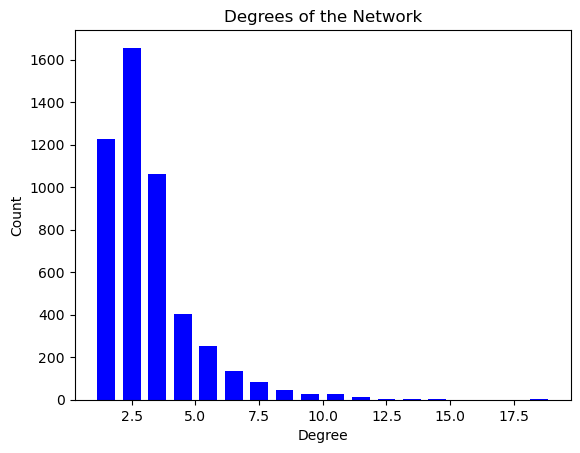

In [79]:
plt.hist(degree_list, bins = range(1,max(degree_list)+1), align = 'mid', color = 'b',rwidth=0.7)
plt.xlabel("Degree")
plt.ylabel("Count")
plt.title("Degrees of the Network")
plt.show()

In [80]:
average_clustering = nx.average_clustering(g)
print("Average clustering coefficient: ", average_clustering)

Average clustering coefficient:  0.04005180554079856


1


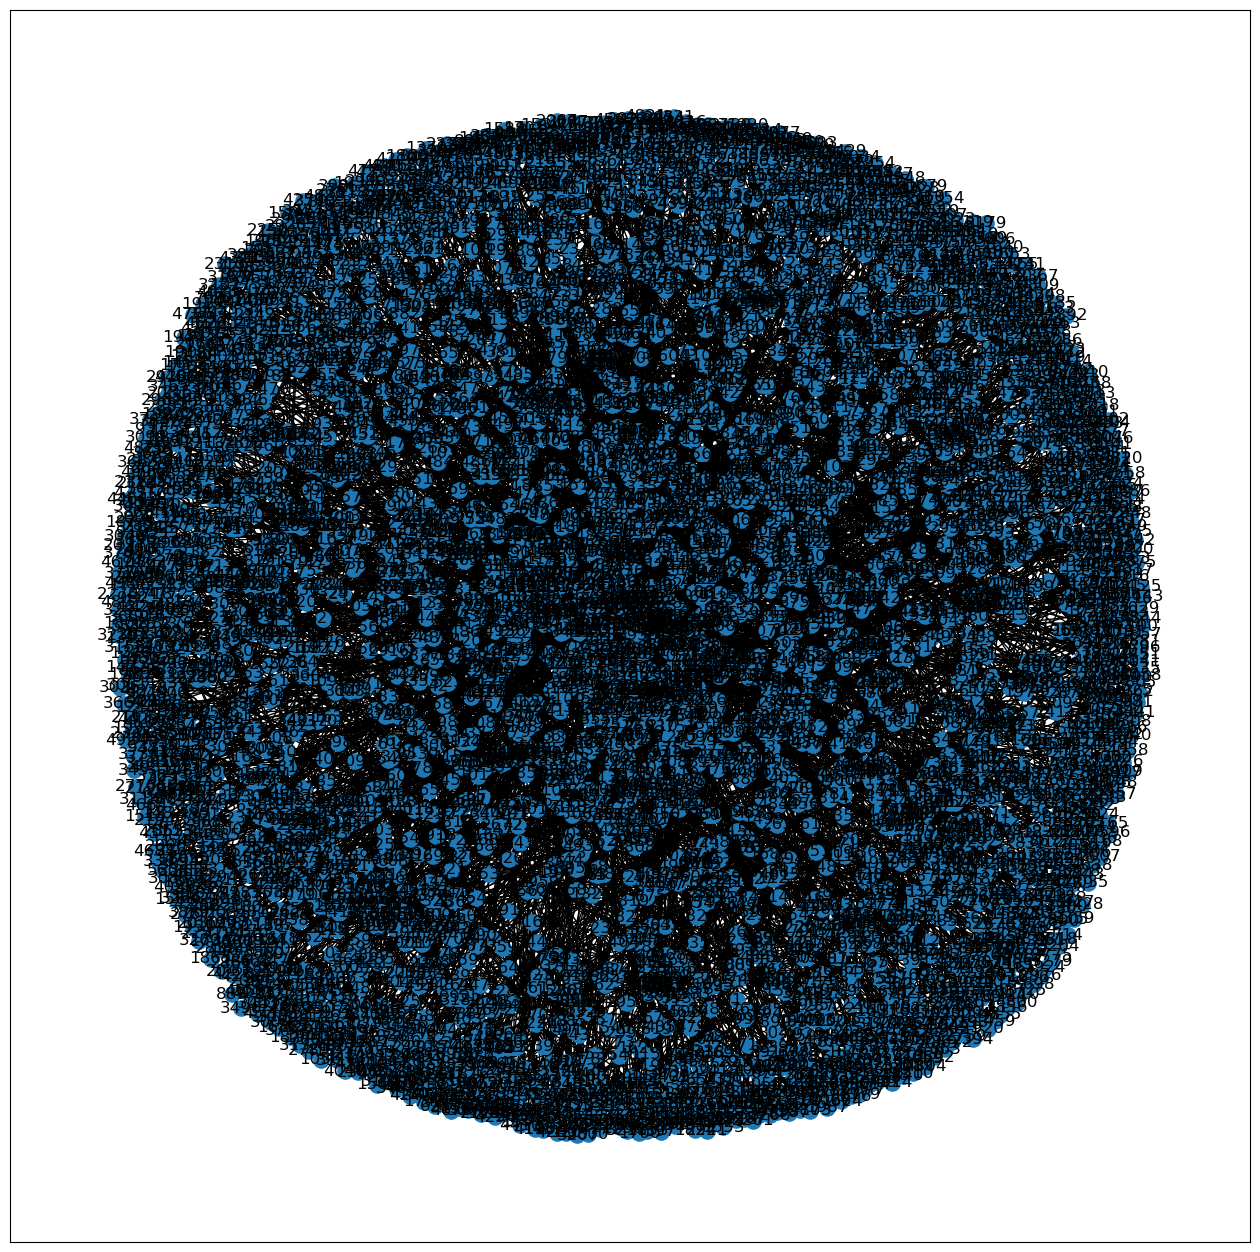

In [81]:
Gcc = sorted(nx.weakly_connected_components(g), key=len) # identify largest connected component of the network
# print(g)
# print(Gcc)
print(len(Gcc))
G = g.subgraph(Gcc[0])
plt.figure(1,figsize=(16,16)) 
nx.draw_networkx(G, node_size=120,font_size=12)

In [82]:
average_shortest_path_length = nx.average_shortest_path_length(G)
print("Average shortest path length: ", average_shortest_path_length)

Average shortest path length:  0.002764032588593992


In [83]:
clustering = nx.clustering(G)
largest_cc = max(clustering.values())
print("Largest clustering coefficient: ", largest_cc)

Largest clustering coefficient:  0.5


In [84]:
nodes_with_largest_cc = [node for node, cc in clustering.items() if cc == largest_cc]
print("Nodes with largest clustering coefficient: ", nodes_with_largest_cc)

Nodes with largest clustering coefficient:  [30, 142, 167, 149, 152, 175, 110, 84, 366, 243, 371, 312, 289, 367, 368, 381, 369, 264, 281, 460, 489, 505, 580, 677, 877, 880, 890, 935, 977, 1196, 2135, 1322, 2184, 1483, 1805, 1558, 1775, 1857, 1918, 1856, 2043, 1617, 1700, 1673, 1898, 2088, 2149, 1868, 2232, 2295, 2403, 2333, 2331, 2289, 2341, 2377, 2299, 2300, 3094, 2719, 3043, 3228, 2525, 2716, 3244, 3279, 2478, 2958, 2989, 3214, 3252, 3113, 2514, 3036, 2520, 3181, 3112, 3179, 3055, 2920, 3207, 2809, 2845, 2995, 3096, 3141, 3149, 2972, 3097, 3205, 3277, 2720, 2911, 3095, 3158, 3199, 3215, 3157, 2652, 3178, 3077, 2684, 2969, 3104, 3200, 3221, 3026, 3143, 2678, 2714, 2758, 3050, 3098, 3099, 2891, 3145, 3180, 3171, 2696, 3133, 3134, 3190, 3270, 2745, 2706, 3263, 2811, 2757, 2756, 3061, 3265, 3042, 2774, 2968, 2784, 3267, 3150, 3211, 3222, 3253, 3238, 2903, 3079, 3116, 3198, 2866, 3131, 2865, 3250, 2935, 3018, 3213, 3038, 3126, 3130, 3275, 3028, 3153, 2879, 3111, 2998, 3230, 2996, 3245, 30

In [85]:
all_shortest_paths = []
for i in [nx.shortest_path(G)][0].keys():
    shortest_paths = list(nx.shortest_path(G, i).values())
    max_shortest_path = max(shortest_paths, key = len)
    all_shortest_paths.append(max_shortest_path)
longest_shortest_path = max(all_shortest_paths, key = len)
print('Longest_shortest_path: ', longest_shortest_path)

Longest_shortest_path:  [1121, 1122, 1275, 1307, 1308, 2594, 2605, 2606, 2607, 2608, 2623, 2979, 3054]
